In [ ]:
import hydra

from omegaconf import DictConfig, OmegaConf

In [ ]:
cfg = OmegaConf.load("conf/dataset/test.yaml")

In [ ]:
cfg.dataset.augmentation_pipeline
# a = cfg.dataset.base_pipeline[1]
# a = OmegaConf.to_container(a)
# a['args'].values()
# for step in a['args'].values():
#     print(step)

In [ ]:
# @hydra.main(version_base=None, config_path="conf", config_name="config")

SyntaxError: incomplete input (530362005.py, line 1)

In [ ]:
from Colpo.dataset.transforms import TransformPipeline

In [ ]:
a = TransformPipeline(cfg.dataset.augmentation_pipeline)

In [ ]:
a.explicit_grid

[{1: {'p': 0.0}, 2: {'p': 0.0}},
 {1: {'p': 0.0}, 2: {'p': 1.0}},
 {1: {'p': 1.0}, 2: {'p': 0.0}},
 {1: {'p': 1.0}, 2: {'p': 1.0}}]

In [1]:
import pandas as pd
import numpy as np
import os
from collections import Counter
import os
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import models, transforms
from torchvision.transforms import functional as t_F
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import hydra
from omegaconf import DictConfig, OmegaConf
from Colpo.dataset.transforms import TransformPipeline
from Colpo.dataset.main_dataset import MainDataset_Cached
from Colpo.dataset.preprocess import Imputation, prepare_dataframe
from Colpo.dataset.build import build_dataset, build_preprocessor

In [2]:
from hydra import initialize, compose
from omegaconf import OmegaConf

with initialize(config_path="conf"):
    cfg = compose(config_name="config")

# print(OmegaConf.to_yaml(cfg))

C:\Users\Yasin\AppData\Local\Temp\ipykernel_18860\2289920348.py:4: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path="conf"):


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
os.environ["TORCH_HOME"] = "D:\Yasin\.checkpoints"
data_root = 'D:\Data'

In [7]:
# train_df = pd.read_excel(os.path.join(data_root, 'Meta/train_main_features_75.xlsx'), keep_default_na=False, na_values=[""], dtype = str)
# test_df = pd.read_excel(os.path.join(data_root, 'Meta/test_main_features_75.xlsx'), keep_default_na=False, na_values=[""], dtype = str)
# train_hpv = pd.read_excel(os.path.join(data_root, 'Meta/train_HPV_features_75.xlsx'),)
# test_hpv = pd.read_excel(os.path.join(data_root, 'Meta/test_HPV_features_75.xlsx'),)

In [8]:
# test_df.head()

In [9]:

preprocessor = build_preprocessor(cfg.preprocess)
# test_df = preprocessor.transform(test_df, test_hpv)

In [18]:
# img = Image.open(os.path.join(data_root, "Cropped Folder", train_df['Patient ID'][0], train_df['jpg_file'][0]))
# img

In [10]:
# train_df, imp = prepare_dataframe(train_df, train_hpv)
# test_df, _ = prepare_dataframe(test_df, test_hpv, imp)


In [11]:

test_df.head()

,Patient ID,jpg_file,xlsx_file,Date,Adeno:conclusive,AA:Color,AA:Margin of aceto acid,AA:Surface,AA:Size,Vessels:Punctuation,...,EXTRA INFO,Age,Smoking,Drink,SD,Married,#Partner,Pop,Abnormality(Impression),Abnormality(BX)
0,18.602,18_602/18_602_A1.JPG,18.602.xlsx,1404.4,Yes,Snowy White,Geographical,Flat,Large,Fine,...,NaN,31,Yes,Yes,26,No,8,NILM,True,True
1,18.617,18_617/18_617_A1.JPG,18.617.xlsx,1403.1*0,Yes,Pink,None,None,None,None,...,NaN,40,No,No,28,NaN,NaN,NILM,False,False
2,17.94,17_94/17_94_A2.TIF,17.94.xlsx,1402.10.,No,Off White,Straight,Flat,Small,Coarse,...,NaN,42,No,No,22,NaN,NaN,HSIL,True,True
3,19.663,19.663/19_663_A2.JPG,19.663.xlsx,1404.05,Yes,Snowy White,Geographical,Flat,Large,None,...,NaN,30,Yes,Yes,19,Yes,4,NILM,True,False
4,19.154,19.154/19_154_A2.JPG,19.154.xlsx,D 1404.02,No,Snowy White,Geographical,Flat,Large,None,...,NaN,41,NaN,NaN,29,Yes,1,NaN,True,True


In [12]:
# # cfg = OmegaConf.load("conf/dataset/test.yaml")
# base_pipeline = TransformPipeline(cfg.dataset.dataset.base_pipeline)
# aug_pipeline = TransformPipeline(cfg.dataset.dataset.augmentation_pipeline)

In [13]:
# test_dataset = MainDataset_Cached(test_df, 
#                                  image_root= cfg.dataset.dataset.image_root, 
#                                  aug_mode = cfg.dataset.dataset.aug_mode, 
#                                  label_col = cfg.dataset.dataset.label_col, 
#                                  include_original = cfg.dataset.dataset.include_original, 
#                                  num_random_augs = cfg.dataset.dataset.num_random_augs, 
#                                  extra_feature_cols= cfg.dataset.dataset.extra_feature_cols, 
#                                  base_pipeline= base_pipeline, 
#                                  augmentation_pipeline = aug_pipeline)

In [14]:
# cfg.dataset.Data_info = test_df
# kwargs = {'Data_info': test_df}
# test_dataset = build_dataset(cfg.dataset, **kwargs)
test_dataset = build_dataset(cfg.dataset, preprocessor= preprocessor)

[MainCachedDataset] Mode: fully_cached | Images: 106 | Explicit variants/image: 4 | Include original: True | Total samples: 1378


In [15]:
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

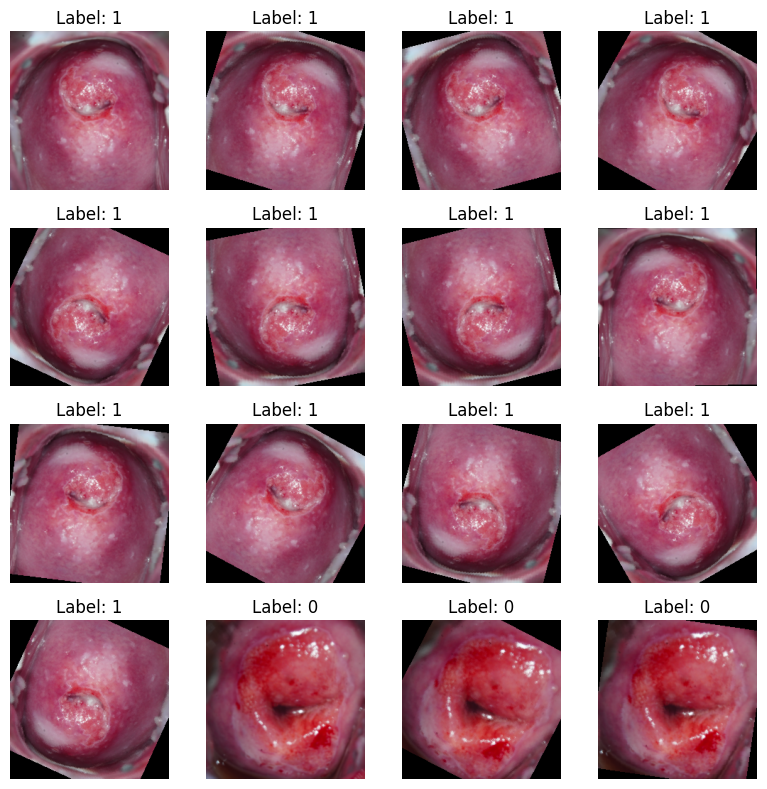

In [16]:
import matplotlib.pyplot as plt

def show_all_augmentations(dataset, img_idx):
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    for i in range(16):
        img, _, _ = dataset[img_idx * 16 + i]
        axes[i // 4, i % 4].imshow(img.permute(1, 2, 0).numpy() * 0.5 + 0.5)
        axes[i // 4, i % 4].axis('off')
    plt.show()

def show_first_16_from_batch(batch):
    images, extra, labels = batch

    fig, axes = plt.subplots(4, 4, figsize=(8, 8))

    for i in range(16):
        img = images[i].cpu().permute(1, 2, 0).numpy()
        img = img.clip(0, 1)
        label = labels[i].item()

        axes[i // 4, i % 4].imshow(img)
        axes[i // 4, i % 4].set_title(f"Label: {label}")
        axes[i // 4, i % 4].axis("off")

    plt.tight_layout()
    plt.show()

# show_all_augmentations(train_dataset, 0)
batch = next(iter(test_loader))
show_first_16_from_batch(batch)

In [ ]:
img = Image.open(os.path.join(data_root, r'Cropped Folder/19.202', r'19.202/19_202_A.JPG'))

In [ ]:
out = a(img, 0)

In [ ]:
# out

In [ ]:
import pandas as pd
a = pd.DataFrame([[1,2],[3,4]], columns= ['a', 'b'])

In [ ]:
type(a)

pandas.core.frame.DataFrame